In [5]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [15]:
# Load preprocessed data
df = pd.read_csv('../data/processed/train_clean.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww matches background colour im seemingly st...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really trying edit war guy constant...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,cant make real suggestions improvement wondere...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page thats


In [20]:
# Input features
X = df['clean_comment']
# Target labels
y = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

# Text Tokenization and Padding
# -----------------------------------------------------
# Hyperparameters
MAX_NUM_WORDS = 50000      # Only keep top 50k words
MAX_SEQUENCE_LENGTH = 150  # Max length of each comment

# Tokenizer
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

# Text to sequences
sequences = tokenizer.texts_to_sequences(X)

# Padding
X_padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

print("X Pad: ",X_padded.shape)

# Train Test Split
# -----------------------------------------------------
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)

print("TRAIN: ",X_train.shape, y_train.shape)
print("TEST : ",X_val.shape, y_val.shape)

X Pad:  (159507, 150)
TRAIN:  (127605, 150) (127605, 6)
TEST :  (31902, 150) (31902, 6)


### LSTM
<br>Multi-label classification → use sigmoid activation + binary_crossentropy loss.

In [21]:
LSTMmodel = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='sigmoid')  # 6 labels (multi-label classification)
])

LSTMmodel.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

LSTMmodel.summary()


/Users/uyennguyen/Projects/NLP-MiniProjects/NLP-final-project/venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Training
history = LSTMmodel.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=128
)

Epoch 1/5
997/997 ━━━━━━━━━━━━━━━━━━━━ 85s 84ms/step - accuracy: 0.5895 - loss: 0.1473 - val_accuracy: 0.9942 - val_loss: 0.0509
Epoch 2/5
997/997 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9758 - loss: 0.0493 - val_accuracy: 0.9941 - val_loss: 0.0493
Epoch 3/5
997/997 ━━━━━━━━━━━━━━━━━━━━ 80s 80ms/step - accuracy: 0.9832 - loss: 0.0415 - val_accuracy: 0.9941 - val_loss: 0.0515
Epoch 4/5
997/997 ━━━━━━━━━━━━━━━━━━━━ 80s 80ms/step - accuracy: 0.9387 - loss: 0.0367 - val_accuracy: 0.9941 - val_loss: 0.0535
Epoch 5/5
997/997 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.8871 - loss: 0.0331 - val_accuracy: 0.9942 - val_loss: 0.0621


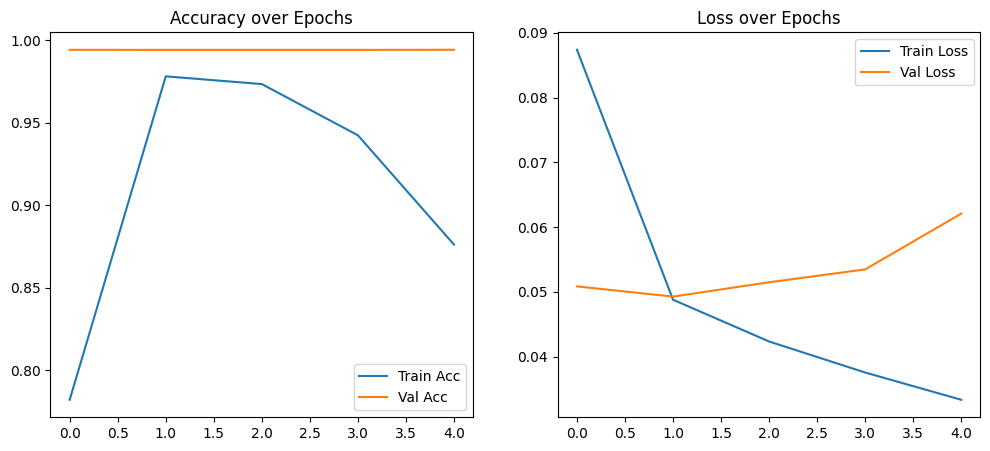

In [23]:
# Plot accuracy and loss curves
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()


In [25]:
# Evaluate
loss, acc = LSTMmodel.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss    : {loss:.4f}")
print(f"Validation Accuracy: {acc:.4f}")


997/997 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9935 - loss: 0.0624
Validation Loss: 0.0621
Validation Accuracy: 0.9942


In [28]:
# Predict on validation set
y_pred = LSTMmodel.predict(X_val)
y_pred = (y_pred > 0.5).astype(int)

print(classification_report(y_val, y_pred, target_names=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']))

997/997 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step
               precision    recall  f1-score   support

        toxic       0.78      0.76      0.77      3012
 severe_toxic       0.57      0.25      0.35       306
      obscene       0.81      0.78      0.79      1643
       threat       0.00      0.00      0.00        79
       insult       0.72      0.64      0.68      1529
identity_hate       0.00      0.00      0.00       264

    micro avg       0.77      0.68      0.72      6833
    macro avg       0.48      0.41      0.43      6833
 weighted avg       0.72      0.68      0.70      6833
  samples avg       0.07      0.06      0.06      6833



/Users/uyennguyen/Projects/NLP-MiniProjects/NLP-final-project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/uyennguyen/Projects/NLP-MiniProjects/NLP-final-project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/uyennguyen/Projects/NLP-MiniProjects/NLP-final-project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` p